<div align="justify"><h1><b><font size="6">
  Input Assumptions for Modelling the Transport Sector in the negaWatt-BE Scenario</h1></font></div>
<div align="justify"><h2><b><font size="5">
  ENERGY DEMAND FOR THE TRANSPORT SECTOR IN BELGIUM
</h2></font></b></div>

---
<div align="justify"><h3><font size="3">
  <b> Developers:</b> LATERRE Antoine, BERNAERTS Valentine, QUOILIN Sylvain, MEYER Sébastien
</h3></font></div> 
    
---

To ensure transparency and consistency within the negaWatt-BE project, this notebook documents all key input assumptions related to the transport sector. It computes the energy demand of passengers and freight transport under sufficiency and efficiency measures over the energy transition period (2020–2050). Projections are based on statistical data from the starting reference year, and the resulting energy demand values are directly used as inputs for the PyPSA model.

> ***Note:** The reference year is 2019 instead of 2020, due to the disruptions caused by the COVID-19 pandemic in 2020. This choice ensures greater consistency and realism in the baseline and future projections.*

<font size="4"><b>Table of Contents</b></font><a class="anchor" id="contents"></a> <br>
1. [Introduction](#section_1)
    - 1.1. [Sufficiency vs Efficiency](#section_1_1)
    - 1.2. [Global Demands](#section_1_2)
        - 1.2.1. [Passenger Mobility](#section_1_2_1)
        - 1.2.2. [Freight](#section_1_2_2)
        - 1.2.3. [Maritime Bunkers](#section_1_2_3)
2. [Passenger Mobility](#section_2)
    - 2.1. [Modal Shares](#section_2_1)
        - 2.1.1. [Aviation](#section_2_1_1)
        - 2.1.2. [Passenger Cars](#section_2_1_2)
        - 2.1.3. [Trains](#section_2_1_3)
        - 2.1.4. [Gentle Modes](#section_2_1_4)
        - 2.1.5. [Metro & Tram](#section_2_1_5)
        - 2.1.6. [Bus & Coach](#section_2_1_6)
        - 2.1.7. [Powered Two-Wheelers](#section_2_1_7)
        - 2.1.8. [Global data processing](#section_2_1_8)
    - 2.2. [Carriers Shares](#section_2_2)

<font size="4"><b>References</b></font><a class="anchor" id="references"></a> <br>

* [1] Rozsai, Mate; Jaxa-Rozen, Marc; Salvucci, Raffaele; Sikora, Przemyslaw; Gea Bermudez, Juan; Neuwahl, Frederik (2025). JRC-IDEES-2023. European Commission, Joint Research Centre (JRC). [Dataset].<br>
  PID: http://data.europa.eu/89h/1f0b480c-6d21-4d95-897d-20c7ca33df6f
* [2] Rozsai, Mate; Jaxa-Rozen, Marc; Salvucci, Raffaele; Sikora, Przemyslaw; Tattini, Jacopo; Neuwahl, Frederik (2024). JRC-IDEES-2021: the Integrated Database of the European Energy System – Data update and technical documentation, Publications Office of the European Union, Luxembourg, 2024. [Report].<br>
  DOI: https://doi.org/10.2760/614599
* [3] Service public fédéral Mobilité et Transports (2019). Enquête monitor sur la mobilité des Belges. Bruxelles: SPF Mobilité et Transports [Report].<br>
Retrieved from: https://mobilit.belgium.be/fr/publications/enquete-monitor-sur-la-mobilite-des-belges
* [4] Service public fédéral Mobilité et Transports (2025). Enquête fédérale sur la mobilité en Belgique. Bruxelles: SPF Mobilité et Transports [Report].<br>
Retrieved from: https://mobilit.belgium.be/fr/publications/enquete-federale-sur-la-mobilite-en-belgique
* [5] Bureau fédéral du Plan (2022). Perspectives de la demande de transport à l’horizon 2040. Bruxelles: BFP [Report].<br>
Retrieved from: https://www.plan.be/fr/publications/perspectives-de-la-demande-de-transport-en
* [6] Association négaWatt (2021). Scénario négaWatt 2022-2050 [Report].<br>
Availale at: https://www.negawatt.org/Scenario-negaWatt-2022
* [7] Service public fédéral Mobilité et Transports (2022). Vision Rail 2040 – Le rail : la colonne vertébrale de la mobilité en Belgique. Bruxelles: SPF Mobilité et Transports [Report].<br>
Retrieved from: https://mobilit.belgium.be/fr/publications/le-rail-la-colonne-vertebrale-de-la-mobilite-en-belgique

<font size="4"><b>Contacts and experts in the field</b></font><a class="anchor" id="contacts"></a>

* Christophe Pauwels (christophe.pauwels@mobilit.fgov.be): person in charge of collecting and managing data related to mobility at the Belgian Federal Public Service for Mobility and Transport (enquetewwv@mobilit.fgov.be, stats.enquetes@mobilit.fgov.be), section Sustainable Mobility and Rail.

<font size="4"><b>Loading external functions</b></font><a class="anchor" id="project_functions"></a>

The functions required for this notebook are loaded here. The macroscopic data (demographic projections, etc.) contained in `demand_model_macro_nW-BE-update.ipynb` are also loaded here.

In [1]:
# Automatically reload the file if it is modified:
%load_ext autoreload
%autoreload 2
# Import packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the macro parameters:
%run ./demand_model_macro_nW-BE-update.ipynb
# Option to print and plot the results:
post_process = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

<font size="5"><b>1. Introduction</b></font> <a class="anchor" id="section_1"></a>

---

The method used to generate the energy demand projections for the transport sector follows the approach of the Joint Research Centre (JRC) of the European Commission for building the Integrated Database of the European Energy System (IDEES) [1,2]. This database compiles statistics related to passenger transport, freight transport, and maritime bunkers.

---

<font size="4"><b>1.1. Sufficiency vs Efficiency</b></font> <a class="anchor" id="section_1_1"></a>

---

To reduce final energy demand in the transport sector, the negaWatt-BE approach relies on two complementary strategies: energy sufficiency and energy efficiency. These strategies are implemented through several levers, presented below, which guide the transition towards a low-energy transport system.
* $\textcolor{Orange}{\textbf{Energy Sufficiency}}$ refers to a reduction in the demand for energy-intensive transport activities. It is achieved through behavioral and systemic changes that avoid or reduce their usage, including modal shifts and shared mobility.
* $\textcolor{Orange}{\textbf{Energy Efficiency}}$ refers to technical improvements that reduce the amount of energy consumed per kilometer travelled or per vehicle, without necessarily reducing mobility demand.

---

<font size="4"><b>1.2. Global Demands</b></font> <a class="anchor" id="section_1_2"></a>

---

This section defines the demand in terms of *final services*. For passenger mobility, this corresponds to the annual distance travelled by the population. For freight transport and maritime bunkers, it corresponds to the annual distance travelled by all transported goods.

---

<font size="3"><b>1.2.1. Passenger Moblity</b></font> <a class="anchor" id="section_1_2_1"></a>

---

Passenger mobility is measured by the total annual distance travelled, representing the total number of kilometers covered each year by the population across all transport modes. In this study, only navigation is excluded, as it is negligible in Belgium. The **passenger mobility** is expressed in **passenger-kilometers per year** [**pkm/year**] and includes commuting, leisure, and other mobility needs. The **passenger mobility intensity** reports the passenger mobility over the population and is expressed in **passenger-kilometers per person per year** [**pkm/person/year**].

To generate passenger mobility statistics for the reference year (2019), we rely on two main sources: (i) the JRC-IDEES database, whose most recent figures date from 2023 [1,2], and (ii) the two most recent Belgian Federal Mobility Surveys, conducted in 2017 and over the period 2024–2025 [3,4]. These two sources are complementary, as the former excludes data related to active modes (walking, cycling), while the latter focuses on daily commuting within Belgium and excludes extra-territorial trips, aviation being the main representative. Although not strictly required to assess the energy consumption of the transport sector, genlte active modes are key components of a transition based on sufficiency. As they help illustrate their contribution to reducing the sector’s energy demand, they are therefore included in this notebook.

For 2019, JRC-IDEES [1,2] reports a value of *172,657 Gpkm* covering mobility by road, rail and air. Based on reports from the Belgian Federal Public Service for Mobility and Transport [3,4], we estimate that in the same year additional contributions amounted at *7,000 Gpkm* for cycling and *3,000 Gpkm* for walking.
The total therefore amounts at *182,657 Gpkm/year*, which corresponds to an average total mobility intensity of **15.979 pkm/person/year**. 

> ***Comment:** Data from the surveys made by the Belgian Federal Public Service for Mobility and Transport [3,4] are exclusively used to assess the passenger-kilometers related to walking and cycling as proper commuting modes (not leisure, sport, etc.).*

> ***Comment:** For 2017, the Belgian Federal Public Service for Mobility and Transport gives 107,034 Gpkm by car [3]. The same year, IDEES gives 106,940 Gpkm [1,2]. This is about -0.1% deviation, which is more than acceptable! But regarding train, the Belgian Federal Public Service for Mobility and Transport gives 17,357 Gpkm [3] while IDEES gives 10,364 Gpkm [1,2]. This is about -40% deviation. The origin of this discrepency should be further investigated!*

> ***Comment:** The Belgian Federal Public Service for Mobility and Transport plans on publishing modal passenger-kilometers for commuting by 2027 (cfr. email from christophe.pauwels@mobilit.fgov.be).*

> ***Comment:** Data for cycling and walking should be refined. The Belgian Federal Public Service for Mobility and Transport (christophe.pauwels@mobilit.fgov.be) has told us that estimates for 2024-2025 are: 7,2 Gpkm for cycling an 4 Gpkm for walking.*

> ***Comment:** The Federal Planning Bureau estimates a mobility intensity of 15.105 pkm/person in 2019 (excluding aviation) [5]. Accounting for aviation (3.176 pkm/person), this value is 2.302 pkm/person higher than ours (+18%).*

> ***Comment:** The Federal Planning Bureau estimates that 172,7 Gpkm were travelled in 2019 (excluding aviation) [5]. Of these, 5.7 Gpkm were travelled on foot and by bicycle.*

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

Excluding gentle modes, from 2000 to 2019, the total mobility intensity has grown by about *+780 pkm/person/year* (or +5.5%) [1,2]. This is driven by aviation (intra and extra Europe), which has grown by about *+1160 pkm/person/year* (or +8.1% w.r.t. total mobility intensity), and also due to rail (passenger trains and urban light rails) which has grown by about *+340 pkm/person/year* (or +2.4% w.r.t. total mobility intensity), while road (two-wheeelers, cars and buses) has decreased by about *-720 pkm/person/year* (or -5.0% w.r.t. total mobility intensity) [1,2].
For its part, the Federal Planning Bureau, excluding aviation but including active modes, estimates that from 1990 to 2019 the total mobility intensity has grown by about *+1830 pkm/person/year* [5].

Despite this increase in the mobility intensity fo the past 30 years, we believe this trend can be reversed, notably because of the expansion of teleworking [5], and through a higher share of urban housing and a prioritisation of closer tourist destinations. Population ageing and increased transportation costs should also reduce the mobility intensity [5]. This reversed trend assumption is further supported by the fact that the Federal Planning Bureau estimates that, under unchanged policies and excluding aviation from the projection, mobility intensity could decrease by around *-100 pkm/person/year* by 2040 (approximately −0.7%) [5].<br> 
In light of this, we project a **-10% reduction** in global mobility intensity by 2050 w.r.t. the 2019 level. This -10% assumption leads to an estimated **14.381 pkm/person/year** by 2050 (*-1.598 pkm/person/year*).
We attribute a significant share of this reduction (around half of it) to a decrease in the number of long-haul flights, for which modal shift is hardly feasible and whose decarbonisation remains uncertain (limited availability of Sustainable Aviation Fuels (SAF), etc.). More details are provided below.


> ***Comment:** This assumption is further supported by the post-COVID-19 recovery of mobility: it took more than five years for the individual annual distance travelled to return to its pre-crisis level (it had dropped by about -30% from 2019 to 2020) [1,2]. This moderate pace of recovery illustrates the feasibility of reducing the individual annual distance travelled.*

> ***Comment:** Our -15% reduction is a conservative assumption with respect to the négaWatt 2022-2050 scenario [6] for France, which assumes a 23% reduction. /!\ Need to check if we can find this -23% in the nW scenario - haven't found it so far /!\ *

> ***Comment:** Should also further motivate the -15% drop: teleworking and urban housing are maybe not enough.*

> ***Comment:** Could also make a BAU scenario.*


In [2]:
# Inputs - Define Sufficiency Scenario Data (SUF)
ref_pas_mob_spe = 182.65651e+9/population_dict[2019]
pro_pas_mob_spe = -0.10
# Outputs - Sufficiency Scenario Data (SUF)
SUF_data = {"spe_ann_pas_mob [pkm/person/year]": linear_growth(2019, ref_pas_mob_spe, 
                                                               2050, ref_pas_mob_spe*(1+pro_pas_mob_spe), years)}
df_SUF = pd.DataFrame(SUF_data, index=years)
df_SUF["pop [person]"] = df_SUF.index.map(population_dict)
df_SUF["ann_pas_mob [Gpkm/year]"] = df_SUF["spe_ann_pas_mob [pkm/person/year]"]*df_SUF["pop [person]"]*1e-9

---

<font size="3"><b>1.2.2. Freight</b></font> <a class="anchor" id="section_1_2_2"></a>

---

Freight transport is measured by the total annual distance over which goods are transported, representing the total number of kilometers covered each year by the mass of all goods across all transport modes. In this study, international transport through maritine bunkers is adressed in a separate section due to the disproportionate contribution of the Port of Antwerp compared with other activities in Belgium. This indicator is expressed in ton-kilometers (tkm).

To generate freight transport statistics for the reference year (2019), we rely on the JRC-IDEES database, whose most recent figures date from 2023 [1,2].

For 2019, JRC-IDEES [1,2] reports a value of 80,176 Gtkm covering transport by road, rail, air and domestic navigation. 
Reported to the population, this corresponds to an average total individual ton-kilometers of **7.013,66 tkm/person/year**.

> ***Comment:** For 2019, JRC-IDEES reports 55,532 Gtkm for road transport. For the same year, Statbel reports 34,829 Gtkm, combining national and international transport (see https://statbel.fgov.be/en/themes/mobility/transport/road-freight-transport#panel-11). This huge discrepency (+60% for JRC-IDEES) should be further investigated!*

> ***Comment:** For 2019, JRC-IDEES reports 7,960 Gtkm for inland water transport. For the same year, Statbel reports 7,766 Gtkm (see https://statbel.fgov.be/en/themes/mobility/transport/inland-water-transport-waterborne-transport#panel-12). This limited discrepency (+2.5% for JRC-IDEES) futher confirms that there is an issue with road transport!*

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

From 2000 to 2019, the average total individual tonne-kilometres increased by more than +25%, rising from *5.547,86 tkm/person/year* in 2000 to *7.013,66 tkm/person/year* in 2019 [1,2]. Although the 2008 economic crisis caused this value to drop to *5.703,30 tkm/person/year* in 2009, the growth slowdown was later offset, such that the upward trend remained relatively steady overall between 2000 and 2016 (with a peak of *7.532,45 tkm/person/year* reached in that year). Since then, the upward trend has levelled off, with the value fluctuating around *7.000 tkm/person/year*.<br>
In view of the current stabilisation of this metric, we consider it reasonable to project a slight decrease. This is motivated, on the one hand, by a reduction in the consumption of material goods and, on the other hand, by the relocation of certain manufacturing activities and the development of short supply chains and local consumption patterns (e.g. local agriculture, etc.). In light of this, we project a **-10% reduction** in average total individual tonne-kilometres by 2050 w.r.t. the 2019 level.

> ***Comment:** Need to compare this projection with other scenarios.*

> ***Comment:** Freight is usually reported to GWP instead of population [5]. Yet, GWP is out of the scope of this work. We hence stay with population.*

> ***Comment:** Note that the value for 2023 is 6.454,59 tkm/person/year, which is -8% compared to 2019. The -10% is thus perfectly realistic.*

In [3]:
# Inputs - Define Sufficiency Scenario Data (SUF)
ref_fre_tra_spe = 7013.66
pro_fre_tra_spe = -0.10
# Outputs - Sufficiency Scenario Data (SUF)
df_SUF["spe_ann_fre_tra [tkm/person/year]"] = linear_growth(2019, ref_fre_tra_spe, 
                                                            2050, ref_fre_tra_spe*(1+pro_fre_tra_spe), years)
df_SUF["ann_fre_tra [Gtkm/year]"] = df_SUF["spe_ann_fre_tra [tkm/person/year]"]*df_SUF["pop [person]"]*1e-9

---

<font size="3"><b>1.2.3. Maritime Bunkers</b></font> <a class="anchor" id="section_1_2_3"></a>

---

> ***Comment:** TODO! Excluded from nW scenario for now.*

---

<font size="5"><b>2. Passenger Mobility</b></font> <a class="anchor" id="section_2"></a>

---

This section defines the modal shares (type of transport mode) and carrier shares (type of power train) to allocate the total land-based and air-based passenger-kilometers across the different transport modes and transport carriers. 

---

<font size="4"><b>2.1. Modal Shares</b></font> <a class="anchor" id="section_2_1"></a>

---

This section defines the modal shares, which are expressed in percentages of total passenger-kilometers. Walking and cycling (gentle modes) are explicitly included in the distribution, as well as aviation.

The modal shares of the powered modes for the reference year (2019) are based on JRC-IDEES [1,2], while the gentle modes are based on the last two surveys from the Belgian Federal Public Service for Mobility and Transport [3,4]. Note that domestic flights and navigation are excluded due to their negligible contribution.

> ***Comment:** Data for cycling and walking should be refined. The Belgian Federal Public Service for Mobility and Transport (christophe.pauwels@mobilit.fgov.be) has told us that estimates for 2024-2025 are: 7,2 Gpkm for cycling an 4 Gpkm for walking.*

In [4]:
# Inputs - Modal Repartition [Gpkm/year] for reference year (2019)
ref_pas_mob_mod_abs = {
    'pedestrian':           3.00000, # From Belgian Federal Public Service for Mobility and Transport
    'bicycle':              7.00000, # From Belgian Federal Public Service for Mobility and Transport
    'two-wheelers':         1.75208, # From JRC-IDEES
    'tram&metro':           1.47211, # From JRC-IDEES
    'bus&coach':           13.68139, # From JRC-IDEES
    'car':                107.44465, # From JRC-IDEES
    'train-conventional':  10.43600, # From JRC-IDEES
    'train-high speed':     1.56400, # From JRC-IDEES
    'plane-intra EU':      15.59146, # From JRC-IDEES
    'plane-extra EU':      20.71483, # From JRC-IDEES
}
ref_pas_mob_abs = sum(ref_pas_mob_mod_abs.values())
rel_dif = (ref_pas_mob_abs-df_SUF["ann_pas_mob [Gpkm/year]"][2019])/df_SUF["ann_pas_mob [Gpkm/year]"][2019]
if abs(rel_dif*100) > 1e-5: print("Entry values in 'ref_pas_mob_mod_abs' are not correct!")
# Outputs - Modal Shares [%] and Modal Repartition [pkm/person/year] for reference year (2019)
ref_pas_mob_mod_rel = {k: v/ref_pas_mob_abs*100               for k, v in ref_pas_mob_mod_abs.items()} # [%]
ref_pas_mob_mod_spe = {k: v/df_SUF["pop [person]"][2019]*1e+9 for k, v in ref_pas_mob_mod_abs.items()} # [pkm/person/year]

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

By 2019, 58.8% of all passenger-kilometres were made by car while 19.9% were by plane. The remaining 21.3% were shared among public transport, cycling, walking, and other modes. Cars (with an average occupancy rate of 1,2 [3,4]) and aviation together thus accounted for nearly 80% of total passenger-kilometres in 2019. As these modes of transport are also the most energy-intensive and therefore the most greenhouse-gas-emitting, it is essential to promote modal shift whenever possible, and to limit their use when not.<br>
Although fossil-fuelled cars are gradually being replaced by battery electric vehicles, we believe that a fair transition should limit reliance on this individual mode of transport. Replacing all internal combustion engine cars with electric cars without any modal shift does not seem desirable for several reasons, the main ones being (i) the pressure on raw materials (some of which are critical and also needed for other clean technologies) and (ii) the very large land footprint of car-based mobility, particularly in urban areas.<br>
With regard to aviation, we believe that short-haul flights should shift towards less energy-intensive modes of transport wherever possible. The use of Sustainable Aviation Fuels (SAF) should be prioritised for long-haul flights, for which modal shift is hardly feasible. Nevertheless, due to the limited availability and potential of SAF, as well as the technological and economic challenges of alternative propulsion systems (batteries, hydrogen, etc.), a reduction in very long-distance travel appears essential to reduce the overall environmental footprint.<br>
We therefore set an overall objective of **reducing** the individual demand for **extra-Europe flights** by **-40%**, and of achieving a **modal shift** for **50%** of the **intra-Europe flights** towards **international train services**. Regarding **passenger cars**, we aim at a **modal shift** for **30%** of the **displacements** and an increased adoption of **carpooling**. More details are provided below.

<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #dcdcdc; border-radius: 5px;">
    <strong>Note:</strong> Assuming a round trip to a destination 9.000 km away (such as Brussels–Shanghai or Brussels–Los Angeles), i.e. 18.000 km in total, and using 2019 data (20.715 Gpkm of long-haul flights [1,2]), we can infer that about..150.0833 people could have made such a trip in that year, i.e. exactly 10% of the population. 
    If the total volume of long-haul flights were reduced by -40% by 2050, decreasing to 12,429 Gpkm, then only about 690.500 people could make such a trip, i.e. about 5.5% of the population. 
    Looked at from another perspective, for the same overall mobility budget, the entire Belgian population could make such a trip roughly once every 18 years, i.e. nearly five times over a lifetime. This target of a 40% reduction in long-haul flights therefore appears both realistic and socially acceptable.e.
</dike parking.

---

<font size="3"><b>2.1.1. Aviation</b></font> <a class="anchor" id="section_2_1_1"></a>

---

Reducing by -40% the individual demand of **extra-Europe flights** from 2019 to 2050 means shifting from 1.812 pkm/person/year to 1.087 pkm/person/year (**-725 pkm/person/year**).
The **modal share** of extra-Europe flights hence decreases from **11.3%** in 2019 to **7.6%** in 2050.

In [5]:
# Inputs - Define Sufficiency Scenario Data (SUF)
proj_mob_spe_avi_lng = -0.40
# Outputs - Sufficiency Scenario Data (SUF)
trg_pas_mob_mod_spe = {'plane-extra EU':      (1+proj_mob_spe_avi_lng)*ref_pas_mob_mod_spe['plane-extra EU']} # [pkm/person/year]
trg_pas_mob_mod_abs = {'plane-extra EU':      trg_pas_mob_mod_spe['plane-extra EU']*df_SUF["pop [person]"][2050]*1e-9} # [Gpkm/year]
trg_pas_mob_mod_rel = {'plane-extra EU':      trg_pas_mob_mod_spe['plane-extra EU']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100} # [%]

Therefore, from the overall reduction in mobility intensity of -1.598 pkm/person/year between 2019 and 2050, we infer that nearly 45% of this decrease is due to the reduction in extra-European flights (-725 pkm/person/year).

For the remainder of the analysis, we assume that the remaining 55% of the reduction in mobility intensity (-873 pkm/person/year) comes from all other transport modes combined. This means that, out of the targeted 10% reduction in overall mobility intensity, 5.5% still needs to be achieved through these other modes.
Thus, of the 1.364 pkm/person/year travelled by intra-European flights in 2019, 1.280 pkm/person/year are initially projected for 2050. 

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

As introduced above, we aim to achieve a **modal shift** for **50%** of these trips (640 pkm/person/year). Only **640 pkm/person/year** therefore remain allocated to **intra-European flights**.
Of this 50% modal shift, **25%** is allocated to **high-speed tains** (320 pkm/person/year), **20%** to **conventional** and **night trains** (256 pkm/person/year), and finally **5%** to **coach buses** (64 pkm/person/year).

In [6]:
detla_plane_extra_EU = proj_mob_spe_avi_lng*ref_pas_mob_mod_spe['plane-extra EU'] # [pkm/person/year]
delta_global_demand =  pro_pas_mob_spe*ref_pas_mob_spe # [pkm/person/year]
remain_compression_rel = 1-(detla_plane_extra_EU)/(delta_global_demand) # [-]
remain_compression_abs = remain_compression_rel*delta_global_demand # [pkm/person/year]
reduction_rel = (1+remain_compression_abs/(ref_pas_mob_spe-ref_pas_mob_mod_spe['plane-extra EU']))
trg_pas_mob_mod_spe_ped     = reduction_rel*ref_pas_mob_mod_spe['pedestrian'] # [pkm/person/year]
trg_pas_mob_mod_spe_bic     = reduction_rel*ref_pas_mob_mod_spe['bicycle'] # [pkm/person/year]
trg_pas_mob_mod_spe_mot     = reduction_rel*ref_pas_mob_mod_spe['two-wheelers'] # [pkm/person/year]
trg_pas_mob_mod_spe_car     = reduction_rel*ref_pas_mob_mod_spe['car'] # [pkm/person/year]
trg_pas_mob_mod_spe_bus_cch = reduction_rel*ref_pas_mob_mod_spe['bus&coach'] # [pkm/person/year]
trg_pas_mob_mod_spe_trm_met = reduction_rel*ref_pas_mob_mod_spe['tram&metro'] # [pkm/person/year]
trg_pas_mob_mod_spe_trn_cnv = reduction_rel*ref_pas_mob_mod_spe['train-conventional'] # [pkm/person/year]
trg_pas_mob_mod_spe_trn_spd = reduction_rel*ref_pas_mob_mod_spe['train-high speed'] # [pkm/person/year]
trg_pas_mob_mod_spe_avi_srt = reduction_rel*ref_pas_mob_mod_spe['plane-intra EU'] # [pkm/person/year]
sum_gen = trg_pas_mob_mod_spe_ped     + trg_pas_mob_mod_spe_bic
sum_rod = trg_pas_mob_mod_spe_mot     + trg_pas_mob_mod_spe_car     + trg_pas_mob_mod_spe_bus_cch
sum_ral = trg_pas_mob_mod_spe_trm_met + trg_pas_mob_mod_spe_trn_cnv + trg_pas_mob_mod_spe_trn_spd
sum_avi = trg_pas_mob_mod_spe_avi_srt
sum     = sum_gen + sum_rod + sum_ral + sum_avi
rel_dif = (sum + trg_pas_mob_mod_spe['plane-extra EU']-df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050])/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]
if abs(rel_dif*100) > 1e-5: print("There is an error in forecasting the 2050 mobility intensity!")

In [7]:
# Inputs - Define Sufficiency Scenario Data (SUF)
proj_mob_spe_avi_srt        = -0.50
shft_rel_avi_srt_to_trn_cnv = +0.25
shft_rel_avi_srt_to_trn_spd = +0.20
shft_rel_avi_srt_to_cch     = +0.05
if abs(proj_mob_spe_avi_srt+shft_rel_avi_srt_to_trn_cnv+shft_rel_avi_srt_to_trn_spd+shft_rel_avi_srt_to_cch) > 1e-15: 
    print("There is an error in the modal shift for the 2050 intra-Europe flights!")
# Outputs - Sufficiency Scenario Data (SUF)
trg_pas_mob_mod_spe['plane-intra EU'] = (1+proj_mob_spe_avi_srt)*trg_pas_mob_mod_spe_avi_srt # [pkm/person/year]
trg_pas_mob_mod_abs['plane-intra EU'] = trg_pas_mob_mod_spe['plane-intra EU']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['plane-intra EU'] = trg_pas_mob_mod_spe['plane-intra EU']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]
# Modal shit - Report to other modes
shft_abs_avi_srt_to_trn_cnv = shft_rel_avi_srt_to_trn_cnv*trg_pas_mob_mod_spe_avi_srt
shft_abs_avi_srt_to_trn_spd = shft_rel_avi_srt_to_trn_spd*trg_pas_mob_mod_spe_avi_srt
shft_abs_avi_srt_to_cch     = shft_rel_avi_srt_to_cch    *trg_pas_mob_mod_spe_avi_srt

---

<font size="3"><b>2.1.2. Passenger Cars</b></font> <a class="anchor" id="section_2_1_2"></a>

---

Car travel accounted for nearly 60% of the modal share in 2019 (9.399 pkm/person/year), making it by far the dominant mode of transport.

<br/>
$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$

As discussed above, we aim to reduce the modal share of cars for daily travel. We therefore target a **modal shift** for **30%** of **trips** currently made by car by 2050 (**-2.646 pkm/person/year**).
We prioritise a shift towards public transport (+882 pkm/person/year for buses, +706 pkm/person/year for trains, and +265 pkm/person/year for trams and metro), towards active modes (+617 pkm/person/year for cycling and +88 pkm/person/year for walking), and towards two-wheelers (+88 pkm/person/year).

In [8]:
# Inputs - Define Sufficiency Scenario Data (SUF)
proj_mob_spe_car        = -0.30
shft_rel_car_to_bus     = +0.10
shft_rel_car_to_trn_cnv = +0.08
shft_rel_car_to_byc     = +0.07
shft_rel_car_to_trm_met = +0.03
shft_rel_car_to_mot     = +0.01
shft_rel_car_to_ped     = +0.01
# Outputs - Sufficiency Scenario Data (SUF)
trg_pas_mob_mod_spe['car'] = (1+proj_mob_spe_car)*trg_pas_mob_mod_spe_car # [pkm/person/year]
trg_pas_mob_mod_abs['car'] = trg_pas_mob_mod_spe['car']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['car'] = trg_pas_mob_mod_spe['car']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]
# Modal shit - Report to other modes
shft_abs_car_to_bus     = shft_rel_car_to_bus    *trg_pas_mob_mod_spe_car
shft_abs_car_to_trn_cnv = shft_rel_car_to_trn_cnv*trg_pas_mob_mod_spe_car
shft_abs_car_to_bic     = shft_rel_car_to_byc    *trg_pas_mob_mod_spe_car
shft_abs_car_to_trm_met = shft_rel_car_to_trm_met*trg_pas_mob_mod_spe_car
shft_abs_car_to_mot     = shft_rel_car_to_mot    *trg_pas_mob_mod_spe_car
shft_abs_car_to_ped     = shft_rel_car_to_ped    *trg_pas_mob_mod_spe_car

> ***Comment:** The modal shift from cars to cycling could be greater. Conversely, the shift towards buses, trams and metro may be ambitious if service coverage and frequency are not significantly improved.*


---

<font size="3"><b>2.1.3. Trains</b></font> <a class="anchor" id="section_2_1_3"></a>

---

As a result of the modal shifts away from aviation and cars, the modal share of rail (both conventional and high-speed) increases.
Passenger-kilometres for **conventional trains** increase by **+969 pkm/person/year** (doubled), while *high-speed trains* increases by **+248 pkm/person/year** (tripled).


> ***Comment:** In this scenario, modal shifts from aviation and car travel increase rail demand from 10,436 Gpkm/year to 23,718 Gpkm/year (doubled) for conventional rail and from 1,564 Gpkm/year to 4,843 Gpkm/year for high-speed rail (tripled). In its 'Vision Rail 2040' policy note published in 2022, the Belgian Minister of Mobility, Georges Gilkinet, stated the objective of increasing the modal share of rail from 8% to 15% by 2040 (aviation excluded) [7]. Few quantitative details are provided; however, assuming that conventional rail intensity was 919 pkm/person/year in 2019 [7], doubling the modal share would bring this value to around 1.840 pkm/person/year by 2040. In light of the performance observed in neighbouring countries, this appears achievable through an increase in service supply, without necessarily expanding network density. The projected value of 1.882 pkm/person/year in 2050 for conventional rail is therefore fully consistent with the stated ambition.*

> ***Comment:** It should be noted that, in its business-as-usual outlook, the Belgian Federal Planning Bureau [5] estimates that total rail demand would decrease by 2,8%. Our assumption of more than doubling rail demand therefore requires strong public policies.*

In [9]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_pas_mob_mod_spe['train-conventional'] = trg_pas_mob_mod_spe_trn_cnv+shft_abs_avi_srt_to_trn_cnv+shft_abs_car_to_trn_cnv # [pkm/person/year]
trg_pas_mob_mod_abs['train-conventional'] = trg_pas_mob_mod_spe['train-conventional']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['train-conventional'] = trg_pas_mob_mod_spe['train-conventional']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]
trg_pas_mob_mod_spe['train-high speed'] = trg_pas_mob_mod_spe_trn_spd+shft_abs_avi_srt_to_trn_spd # [pkm/person/year]
trg_pas_mob_mod_abs['train-high speed'] = trg_pas_mob_mod_spe['train-high speed']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['train-high speed'] = trg_pas_mob_mod_spe['train-high speed']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]

---

<font size="3"><b>2.1.4. Gentle Modes</b></font> <a class="anchor" id="section_2_1_4"></a>

---

As a result of the modal shifts away from  cars, the modal share of gentle modes (both pedestrian and walking) increases.
Passenger-kilometres for **pedestrian** increase by **+72 pkm/person/year**, while **cycling** increases by **+580 pkm/person/year**.
The increase in walking intensity results from more multimodal mobility patterns centred on public transport, which require short walking trips, as well as from the expansion of pedestrian-friendly and car-free areas in city centres, in line with current urban mobility policies.
The growth in bicycles is supported by the rapid adoption of electric bikes and major investments in cycling infrastructure, including dedicated cycle lanes and secure bike parking.

> **Comment**: Bicycle only doubles. We could be more ambitious!

In [10]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_pas_mob_mod_spe['pedestrian'] = trg_pas_mob_mod_spe_ped+shft_abs_car_to_ped # [pkm/person/year]
trg_pas_mob_mod_abs['pedestrian'] = trg_pas_mob_mod_spe['pedestrian']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['pedestrian'] = trg_pas_mob_mod_spe['pedestrian']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]
trg_pas_mob_mod_spe['bicycle'] = trg_pas_mob_mod_spe_bic+shft_abs_car_to_bic # [pkm/person/year]
trg_pas_mob_mod_abs['bicycle'] = trg_pas_mob_mod_spe['bicycle']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['bicycle'] = trg_pas_mob_mod_spe['bicycle']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]

---

<font size="3"><b>2.1.5. Metro & Tram</b></font> <a class="anchor" id="section_2_1_5"></a>

---

As a result of the modal shift away from  cars, the modal share of light rail transport systems (both metro and tram) increases.
Passenger-kilometres for **metro** and **tram** increase by **+257 pkm/person/year**.

> ***Comment**: Despite the development of new tram lines in Liège and other cities, this value is likely too high (it is tripled w.r.t. 2019).*


In [11]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_pas_mob_mod_spe['tram&metro'] = trg_pas_mob_mod_spe_trm_met+shft_abs_car_to_trm_met # [pkm/person/year]
trg_pas_mob_mod_abs['tram&metro'] = trg_pas_mob_mod_spe['tram&metro']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['tram&metro'] = trg_pas_mob_mod_spe['tram&metro']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]

---

<font size="3"><b>2.1.6. Bus & Coach</b></font> <a class="anchor" id="section_2_1_6"></a>

---

As a result of the modal shift away from  cars and intra-Europe aviation, the modal share of buses and coaches increases.
Passenger-kilometres for **bus** and **coach** increase by **+872 pkm/person/year**.
This growth is considered plausible if rural and suburban areas are served by an expanded network of high-frequency bus services.
Coach travels within Europe also develop.

In [12]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_pas_mob_mod_spe['bus&coach'] = trg_pas_mob_mod_spe_bus_cch+shft_abs_avi_srt_to_cch+shft_abs_car_to_bus # [pkm/person/year]
trg_pas_mob_mod_abs['bus&coach'] = trg_pas_mob_mod_spe['bus&coach']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['bus&coach'] = trg_pas_mob_mod_spe['bus&coach']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]

---

<font size="3"><b>2.1.7. Powered Two-Wheelers</b></font> <a class="anchor" id="section_2_1_7"></a>

---

As a result of the modal shift away from  cars, the modal share of powered two-wheelers (motorcycle) increases.
Passenger-kilometres for **powered two-wheelers** increase by **+79 pkm/person/year**.
This could be due to an increased use of two-wheelers for commuting in urban and peri-urban areas, particularly given the growing availability of low-emission or electric models.

> ***Comment:** Considering e-scooters, this could be more. Also for multi-modality.*

In [13]:
# Outputs - Sufficiency Scenario Data (SUF)
trg_pas_mob_mod_spe['two-wheelers'] = trg_pas_mob_mod_spe_mot+shft_abs_car_to_mot # [pkm/person/year]
trg_pas_mob_mod_abs['two-wheelers'] = trg_pas_mob_mod_spe['two-wheelers']*df_SUF["pop [person]"][2050]*1e-9 # [Gpkm/year]
trg_pas_mob_mod_rel['two-wheelers'] = trg_pas_mob_mod_spe['two-wheelers']/df_SUF["spe_ann_pas_mob [pkm/person/year]"][2050]*100 # [%]

---

<font size="3"><b>2.1.4. Global data processing</b></font> <a class="anchor" id="section_2_1_4"></a>

---

In [14]:
# Processing - Modal Shares (in %)
modes = {
    'pedestrian':         linear_growth(2019,ref_pas_mob_mod_rel['pedestrian'],
                                        2050,trg_pas_mob_mod_rel['pedestrian'],years),
    'bicycle':            linear_growth(2019,ref_pas_mob_mod_rel['bicycle'],
                                        2050,trg_pas_mob_mod_rel['bicycle'],years),
    'two-wheelers':       linear_growth(2019,ref_pas_mob_mod_rel['two-wheelers'],
                                        2050,trg_pas_mob_mod_rel['two-wheelers'],years),
    'tram&metro':         linear_growth(2019,ref_pas_mob_mod_rel['tram&metro'],
                                        2050,trg_pas_mob_mod_rel['tram&metro'],years),
    'bus&coach':          linear_growth(2019,ref_pas_mob_mod_rel['bus&coach'],
                                        2050,trg_pas_mob_mod_rel['bus&coach'],years),
    'car':                linear_growth(2019,ref_pas_mob_mod_rel['car'],
                                        2050,trg_pas_mob_mod_rel['car'],years),
    'train-conventional': linear_growth(2019,ref_pas_mob_mod_rel['train-conventional'],
                                        2050,trg_pas_mob_mod_rel['train-conventional'],years),
    'train-high speed':   linear_growth(2019,ref_pas_mob_mod_rel['train-high speed'],
                                        2050,trg_pas_mob_mod_rel['train-high speed'],years),
    'plane-intra EU':     linear_growth(2019,ref_pas_mob_mod_rel['plane-intra EU'],
                                        2050,trg_pas_mob_mod_rel['plane-intra EU'],years),
    'plane-extra EU':     linear_growth(2019,ref_pas_mob_mod_rel['plane-extra EU'],
                                        2050,trg_pas_mob_mod_rel['plane-extra EU'],years),
}

# Processing - Modal Shares DataFrame
df_MOD = pd.DataFrame(modes, index=years)
df_MOD = df_MOD.round(3).transpose()

# Processing - Global DataFrame
df_GPKM = pd.DataFrame({year: df_SUF["ann_pas_mob [Gpkm/year]"][year]*df_MOD[year]*1e-2 for year in years}, index=df_MOD.index).round(6)
df_PKMP = pd.DataFrame({year: df_GPKM[year]*1e+9/population_dict[year]                  for year in years}, index=df_MOD.index).round(2)
arrays  =[np.repeat(df_MOD.index, 3), ['% of total', 'pkm/person', 'Gpkm'] * len(df_MOD)]
mi      = pd.MultiIndex.from_arrays(arrays, names=['Mode', 'Unit'])
data_rows = []
for mode in df_MOD.index:
    data_rows.append(df_MOD .loc[mode].values)  # modal percentages
    data_rows.append(df_PKMP.loc[mode].values)  # pkm per person
    data_rows.append(df_GPKM.loc[mode].values)  # Gpkm values
data = np.vstack(data_rows)
df_passenger_mobility = pd.DataFrame(data, index=mi, columns=years)

Mode,Unit,2019,2025,2030,2035,2040,2045,2050
pedestrian,% of total,1.64,1.77,1.89,2.00,2.10,2.22,2.33
,pkm/person,262.37,278.13,290.51,302.32,313.56,324.39,334.49
,Gpkm,3.00,3.29,3.49,3.68,3.87,4.05,4.21
bicycle,% of total,3.83,4.70,5.41,6.13,6.85,7.57,8.29
,pkm/person,612.30,735.67,834.38,929.38,1020.53,1108.12,1192.01
,Gpkm,7.00,8.69,10.03,11.33,12.60,13.84,15.02
two-wheelers,% of total,0.96,1.09,1.19,1.30,1.40,1.51,1.61
,pkm/person,153.23,170.17,183.55,196.54,208.84,220.75,231.96
,Gpkm,1.75,2.01,2.21,2.40,2.58,2.76,2.92
tram&metro,% of total,0.81,1.17,1.47,1.77,2.08,2.38,2.68


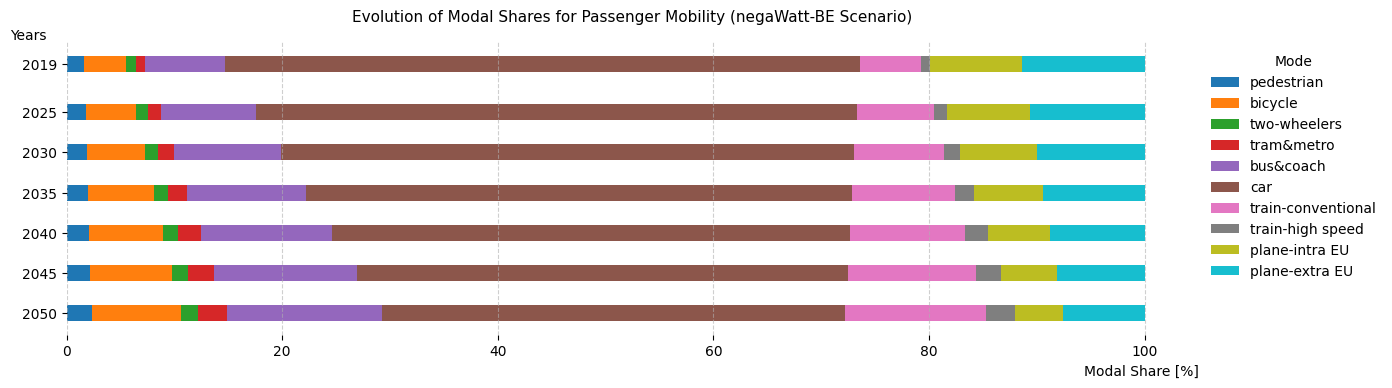

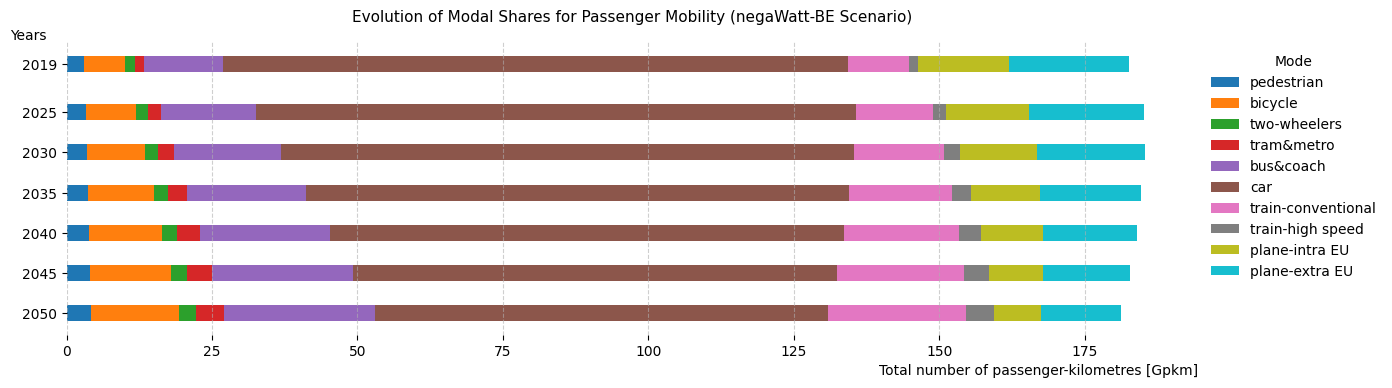

In [23]:
if post_process:
    df_passenger_mobility_r = df_passenger_mobility.reset_index()
    total_Gpkm = df_SUF["ann_pas_mob [Gpkm/year]"]
    total_kmp  = df_SUF["spe_ann_pas_mob [pkm/person/year]"]
    rows = []
    for unit in ['% of total', 'pkm/person', 'Gpkm']:
        if unit == '% of total':
            vals = [100] * len(years)
        elif unit == 'Gpkm':
            vals = [total_Gpkm[year] for year in years]
        else:
            vals = [total_kmp [year] for year in years]
        rows.append(pd.DataFrame([['TOTAL', unit, *vals]], columns=df_passenger_mobility_r.columns))
    df_passenger_mobility_r = pd.concat([df_passenger_mobility_r] + rows, ignore_index=True)
    mode_full = df_passenger_mobility_r['Mode'].tolist()
    df_passenger_mobility_r['Mode'] = np.where(df_passenger_mobility_r['Unit'] == '% of total', df_passenger_mobility_r['Mode'], '')
    styled = (
        df_passenger_mobility_r.style
          .apply(highlight_lines, axis=1)
          .set_properties(subset=['Mode'], **{'font-weight':'bold'})
          .set_properties(subset=['Unit'], **{'font-style':'italic','color':'gray'})
          .format({year:"{:.2f}" for year in years})
          .set_caption("Modal Shares")
          .hide(axis='index')
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
    )
    display(styled)

    dfmp = df_MOD.transpose()
    fig1, ax = plt.subplots(figsize=(14, 4))
    bottom = np.zeros(len(dfmp))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, mode in enumerate(dfmp.columns):
        ax.barh(dfmp.index, dfmp[mode],
                left=bottom, label=mode,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfmp[mode]
    ax.set_xlabel("Modal Share [%]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of Modal Shares for Passenger Mobility (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Mode", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()

    dfmp = df_passenger_mobility.transpose()
    fig2, ax = plt.subplots(figsize=(14, 4))
    bottom = np.zeros(len(dfmp))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    j = 0
    for i, mode in enumerate(dfmp.columns):
        if mode[1] == 'Gpkm':
            ax.barh(dfmp.index, dfmp[mode],
                    left=bottom, label=mode[0],
                    color=colors[j % len(colors)],
                    height=bar_height)
            bottom += dfmp[mode]
            j += 1
    ax.set_xlabel("Total number of passenger-kilometres [Gpkm]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of Modal Shares for Passenger Mobility (negaWatt-BE Scenario)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Mode", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig2.tight_layout()
    plt.show()


---

<font size="4"><b>2.2. Carriers Shares</b></font> <a class="anchor" id="section_2_2"></a>

---

This section presents the internal distribution of each transport mode by energy carrier or vehicle type, as a percentage of the total Gpkm for that mode. These shares are used to calculate the weighted energy demand and infrastructure needs per technology.

> **Comment**: For most modes, the projections were made starting from 2015 JRC data and extended to 2050. However, in the case of cars, the situation is different: the 2050 projections are based on estimated values for 2019, which themselves were derived from 2015 data. Now that updated JRC statistics are available up to 2021, it’s clear that the 2019 estimates used as a baseline for cars are inaccurate. To stay aligned with the rest of the analysis (which begins in 2019), the 2015 values are not displayed here, but this also highlights the need to revise the entire car breakdown using the most recent data.

---

<font size="3"><b>2.2.1. Bicycle </b></font> <a class="anchor" id="section_2_2_1"></a>

---

The bicycle mode is split between human-powered and electric bicycles. Shares are given as a percentage of total bicycle Gpkm [5].

$\textcolor{Orange}{\textbf{Comfort Assumption}}$<br>
- **Electric-powered**: 25% in 2020 → 40% in 2050. Growth driven by infrastructure and accessibility.
- **Human-powered**: 75% in 2020 → 60% in 2050. Slight decrease due to rising e-bike adoption.

> **Comment**: The carrier share breakdown should be revised using the updated 2020 data.

In [16]:
# Bicycle
bike_shares = {
    'human':      [75.0, 73.0, 70.0, 67.0, 64.0, 60.0, 60.0],
    'electrical': [25.0, 27.0, 30.0, 33.0, 36.0, 40.0, 40.0],
}
df_bike = pd.DataFrame(bike_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.2. Motorcycle </b></font> <a class="anchor" id="section_2_2_2"></a>

---

The motorcycle mode is divided between liquid-fuel and electric motorcycles. Shares refer to the percentage of total motorcycle Gpkm.

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
The goal is to minimise liquid fuel use as much as possible by 2050. However, full phase-out is unlikely, because e-fuels, biofuels or hybrids will probably remain.
- **Liquid fuel-powered**: 99.8% in 2020 → 15.0% in 2050
- **Electric-powered**: 0.2% in 2020 → 85.0% in 2050
- NGV/biomethane: excluded (0% throughout)

> **Comment**: Hybrid options, although excluded here, could also play a transitional role and should be considered.

> *<u>COMMENT:</u> **Question data!** In Assumptions_TransportnWBE_220630.xlsx, 15% NGV/biomethane by 2050. Why excluded here?*

> *<u>COMMENT:</u> **Question data!** Shouldn't we specify which liquid fuel here? As for cars*

In [17]:
# Motorcycle
moto_shares = {
    'liquid_fuel': [99.8, 95.0, 70.0, 45.0, 20.0, 20.0, 15.0],
    'electrical':  [ 0.2,  5.0, 30.0, 55.0, 80.0, 80.0, 85.0],
}
df_moto = pd.DataFrame(moto_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.3. Car </b></font> <a class="anchor" id="section_2_2_3"></a>

---

This mode includes all types of car, with shares expressed as a percentage of the total Gpkm for cars.

#### Fuel Switch

In 2019, only **0.5%** of the car fleet in Belgium is electrified [3]. Most vehicles still run on fossil fuels (diesel, petrol, CNG, etc.).

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
By 2050, the electrification ratio is expected to cover **99.5%** of the fleet. This implies a complete phase-out of combustion engines, progressively replaced by electric vehicles. The transition is assumed to be linear over the period.
- **Electric-powered**: 0.5% in 2020 → 99.5% in 2050.
- **Other power trains**: decrease proportionally, starting from their 2019 shares.

> **Comment**: Update values in new JRC.

> <u>COMMENT:</u> *Several efficiency data do not match Assumptions_Transport_nWBE_220630.xlsx (Sebastien) -> which ones should we take? Fuel switch don't match either!!!*

The following method is used to compute all car types except BEVs:
$$
\text{Share}_{y} = \text{Share}_{2019} \times \frac{100 - \text{BEV}_{y}}{99.5}
$$

#### Energy Consumption Improvement

In 2019, the average specific energy consumption for battery electric vehicles (BEV) in Belgium is set at **0.22 kWh/km** $\textcolor{red}{[ref]}$, representing the combined result of current vehicle design, driving habits, and technical performance.

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
By 2050, this value is expected to decrease to **0.13 kWh/km**, based on projections from the negaWatt France scenario $\textcolor{red}{[ref]}$. This value is directly used in the Belgian dashboard, assuming that vehicle efficiency evolves similarly in Belgium and France, without further national adaptation.

This overall improvement of 40% reflects the combined effect of several technological changes:
- lighter vehicles,
- improved aerodynamics,
- regenerative braking,
- more efficient powertrains and battery systems.
- Gradual adoption of speed-limiting policies and eco-driving behaviour

> **Comment**: Although these improvements implicitly account for the effects of reduced speed and vehicle weight, they are not modelled separately. Future work could aim to link these effects more transparently to this parameter.

In [18]:
# Car
tech_data = {
    "electrification [%]":  [ 0.500,  6.000, 18.000, 35.000, 56.000, 78.000, 99.500],  
    "efficiency [kWh/km]":  [ 0.220,  0.213,  0.190,  0.161,  0.145,  0.128,  0.128] 
}

df_techno = pd.DataFrame(tech_data, index=years)

initial_shares = {
    "gasoline":        35.3,
    "diesel":          62.5,
    "LPG":              0.2,
    "plug-in_gasoline": 1.1,
    "plug-in_diesel":   0.1,
    "plug-in_LPG":      0.0,
    "NGV/biomethane":   0.3,
    "hydrogen":         0.0,
}

car_shares = {}
for mode, init in initial_shares.items():
    projected = []
    for year in years:
        bev_pct = df_techno.loc[year, "electrification [%]"]
        projected.append(init * (100 - bev_pct) / 99.5)
    car_shares[mode] = projected
car_shares["electrical"] = df_techno["electrification [%]"].tolist()
df_cars = pd.DataFrame(car_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.4. Bus </b></font> <a class="anchor" id="section_2_2_4"></a>

---

The bus mode is split between liquid-fuel buses and electric buses. Shares are given as a percentage of total bus Gpkm.

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
The goal is to minimise liquid fuel use as much as possible by 2050.
- **Liquid-fuel**: 99.8% in 2019 → 10% in 2050.
- **Electric**: 0.2% in 2019 → 90% in 2050.

> **Comment**: It is a strong assumption that only 10% of buses will use liquid fuel by 2050. In 2020, 'liquid fuel' means diesel, but in 2050 it will mean e-fuel and/or biofuel. The JRC also mentions natural gas buses and hybrids are likely to be used. These figures should be revisited.

> *<u>COMMENT:</u> **Question data!** Shouldn't we specify which liquid fuel here? As for cars*

In [19]:
# Bus
bus_shares = {
    'liquid_fuel': [99.8, 98.0, 94.0, 82.0, 59.0, 35.0, 10.0],
    'electrical':  [ 0.2,  2.0,  6.0, 18.0, 41.0, 65.0, 90.0],
}
df_bus = pd.DataFrame(bus_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.5. Train </b></font> <a class="anchor" id="section_2_2_5"></a>

---

The train mode is divided between electric and liquid-fuel trains. Shares are expressed as a percentage of total train Gpkm.

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
- **Electric**: 90% in 2020 → 100% in 2040 and beyond. Complete electrification of the network.
- **Liquid-fuel**: 10% in 2020 → 0% in 2040. Gradual phase-out, mainly used for freight.

Linear transition until 2040, then fixed shares.

> *<u>COMMENT:</u> **Question data!** Shouldn't we specify which liquid fuel here? As for cars. Quite unlikely to go full eletrical.*

> *<u>COMMENT:</u> **Question data!** Shouldn't freight be excluded here? As it is treated hereunder...*

In [20]:
# Train
train_shares = {
    'electrical':  [90, 92.5, 95, 97.5, 100, 100, 100],
    'liquid_fuel': [10,  7.5,  5,  2.5,   0,   0,   0],
}
df_train = pd.DataFrame(train_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.6. Global data processing</b></font> <a class="anchor" id="section_2_2_6"></a>

---


In [21]:
df_ped = pd.DataFrame({'human': [100] * len(years)}, index=years).T
df_carriers = {
    'pedestrian': df_ped,
    'bicycle':    df_bike,
    'motorcycle': df_moto,
    'car':        df_cars,
    'bus':        df_bus,
    'train':      df_train,
}
rows = []
for mode, df in df_carriers.items():
    temp = df.copy()
    temp['Mode'] = mode
    temp['Type'] = temp.index
    temp = temp.reset_index(drop=True)
    rows.append(temp)
df_carrier = pd.concat(rows, ignore_index=True)

if post_process:
    df_carrier['Mode'] = df_carrier['Mode'].mask(df_carrier['Mode'].duplicated(), '')
    df_carrier_r = df_carrier[['Mode', 'Type'] + list(years)]
    styled = (
        df_carrier_r.style
          .hide(axis='index')
          .set_caption("Carrier Shares (%)")
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
          .apply(highlight_mode_separator, axis=1)
          .apply(lambda row: [bold_mode(cell, row['Mode'], col) for col, cell in zip(df_carrier_r.columns, row)], axis=1)
          .set_properties(subset=['Type'], **{'font-style':'italic'})
          .format({year: "{:.3f}%" for year in years})
    )
    display(styled)

Mode,Type,2019,2025,2030,2035,2040,2045,2050
pedestrian,human,100.000%,100.000%,100.000%,100.000%,100.000%,100.000%,100.000%
bicycle,human,75.000%,73.000%,70.000%,67.000%,64.000%,60.000%,60.000%
,electrical,25.000%,27.000%,30.000%,33.000%,36.000%,40.000%,40.000%
motorcycle,liquid_fuel,99.800%,95.000%,70.000%,45.000%,20.000%,20.000%,15.000%
,electrical,0.200%,5.000%,30.000%,55.000%,80.000%,80.000%,85.000%
car,gasoline,35.300%,33.349%,29.091%,23.060%,15.610%,7.805%,0.177%
,diesel,62.500%,59.045%,51.508%,40.829%,27.638%,13.819%,0.314%
,LPG,0.200%,0.189%,0.165%,0.131%,0.088%,0.044%,0.001%
,plug-in_gasoline,1.100%,1.039%,0.907%,0.719%,0.486%,0.243%,0.006%
,plug-in_diesel,0.100%,0.094%,0.082%,0.065%,0.044%,0.022%,0.001%


---

<font size="5"><b>3. Freight Transport</b></font> <a class="anchor" id="section_3"></a>

---

This section defines the modal and carrier shares used to allocate the total land-based tonne-kilometers across the different transport modes and transport carriers. 

---

<font size="4"><b>3.1. Modal Shares</b></font> <a class="anchor" id="section_3_1"></a>

---

This section defines the modal shares, which are expressed in percentages. Air transport is excluded.
The modal shares are based on JRC data from 2015 [3], with the objective of reducing road freight by shifting to rail and inland waterways.
> **Comment**: The reference year of 2015 has not been updated to reflect values from 2019. Additionally, the dataset used does not fully correspond to the figures provided by the JRC.

> *<u>COMMENT:</u> **Question data!** Why is international maritime excluded? Why is aviation excluded?*


---

<font size="3"><b>3.1.1. Inland Waterways</b></font> <a class="anchor" id="section_3_1_1"></a>

---

The proportion of inland waterborne freight is expected to grow from 15% in 2019 to 23% in 2050. Assuming a gradual and continuous increase, this growth would counterbalance the reduction in road freight without placing excessive strain on the rail network.
It is important to note that international waterborne freight is calculated separately but excluded from these modal share percentages. This is because its volumes are very large compared to domestic freight, which would visually distort the shares and mask smaller but important changes in other modes.

---

<font size="3"><b>3.1.2. Rail</b></font> <a class="anchor" id="section_3_1_2"></a>

---

In 2019, rail accounted for 10% of the total. Based on 'Vision Rail 2040' [6], the expected target is 20%. However, this scenario intentionally remains below the 20% target in order to preserve a significant role for inland waterways. Here, the share increases to 19% in 2040 and remains constant until 2050.
> **Comment**: This constant evolution over ten years does not seem realistic to me, as real systems evolve more progressively.

---

<font size="3"><b>3.1.3. Road</b></font> <a class="anchor" id="section_3_1_3"></a>

---

Road freight decreases from 75% in 2020 to 58% in 2050. The shift away from road is motivated by the need to decarbonize the sector and reduce energy demand. It is disaggregated in two ways:
- by **type of route**:
    - **National** freight decreases from 35% to 27% between 2020 and 2050.
    - **International** freight drops from 40% to 31% over the same period.
- by **vehicle type**:
    - **LCVs** (light commercial vehicles) remain stable at around 1.5–1.6%, reflecting their continued use for short-distance and last-mile logistics.
    - **HDVs** (heavy-duty vehicles), which dominate the road freight segment, see a reduction from 73.5% in 2020 to 56.4% in 2050, consistent with the overall decrease in road freight.

Both breakdowns refer to the same total share of road freight and cannot be added together. The objective is to reduce long-distance freight, especially that carried by HDVs, which can more easily be shifted to rail or water. LCVs remain dominant for short urban deliveries and are considered to be a constant factor.

> **Comment**: The "type of travel" data (national and international) is taken from the dashboard and therefore does not have a real source. They were used to determine the total road freight transport rather than JRC valuesAn assumption was then applied to split the total into LCVs and HDVs. This approach differs from the actual JRC figures.

---

<font size="3"><b>3.1.4. Global data processing</b></font> <a class="anchor" id="section_3_1_4"></a>

---


---

<font size="4"><b>3.2. Carrier Shares</b></font> <a class="anchor" id="section_3_2"></a>

---

This section defines the carries shares, which are expressed in percentages. Air transport is excluded.

---

<font size="5"><b>4. Aviation</b></font> <a class="anchor" id="section_4"></a>

---


In [22]:
# Passenger-kilometres for flights 
Gpkm_air = {
    'Domestic Belgium':       [     0,      0,      0,      0,      0,      0,      0],
    'International intra-EU': [15.311, 15.303, 12.753,  8.927,  8.927,  8.927,  8.927],
    'International extra-EU': [21.672, 19.129, 14.028, 10.202, 10.202, 10.202, 10.202],
}

df_air = pd.DataFrame(Gpkm_air, index=years).T.round(3)
df_air.loc["Total"] = df_air.sum(axis=0)

Needed output for PyPSA:
* Total number of car and corresponding average fuel consumption (kWh/km)
* FEC for road mobility